In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report,roc_curve,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler,RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

In [3]:
import kagglehub
import warnings
warnings.filterwarnings("ignore")
path = kagglehub.dataset_download("mastmustu/income")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Avinash\.cache\kagglehub\datasets\mastmustu\income\versions\1


In [4]:
data=pd.read_csv(r"C:\Users\Avinash\.cache\kagglehub\datasets\mastmustu\income\versions\1\train.csv")

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [6]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income_>50K         int64
dtype: object

In [7]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
data=data.dropna()

In [9]:
data=data.drop_duplicates()

In [10]:
data=data.rename(columns={"native-country":"country","hours-per-week":"hours_per_week","capital-loss":"capital_loss","capital-gain":"capital_gain","marital-status":"marital_status"})

In [11]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country',
       'income_>50K'],
      dtype='object')

In [12]:
data.rename(columns={"educational-num":"educational_num","income_>50K":"income"},inplace=True)

In [13]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'income'],
      dtype='object')

In [14]:
data.shape

(40686, 15)

In [15]:
X=data.drop("income",axis=1)[:5000]

In [16]:
y=data["income"][:5000]

In [17]:
X.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
country            object
dtype: object

In [18]:
num_cols=X.select_dtypes(include="int64").columns.tolist()

In [19]:
cat_cols=X.select_dtypes(include="object").columns.tolist()

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [21]:
num_cols

['age',
 'fnlwgt',
 'educational_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [22]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'country']

In [23]:
preprocessor = ColumnTransformer(transformers=[
    ("robust", RobustScaler(), num_cols),
    ("onehot", OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"), cat_cols)
])


In [24]:
pipe_line = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", KNeighborsClassifier())
])

In [25]:
param_grid = {
    'model__n_neighbors':range(1, 20, 2),
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]}

In [26]:
grid=RandomizedSearchCV(pipe_line,param_distributions=param_grid,n_iter=20,cv=5,n_jobs=-1,scoring="accuracy")

In [45]:
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('robust',
                                                                               RobustScaler(),
                                                                               ['age',
                                                                                'fnlwgt',
                                                                                'educational_num',
                                                                                'capital_gain',
                                                                                'capital_loss',
                                                                                'hours_per_week']),
                                                                              ('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['workclass',
                                                                                'education',
                                                                                'marital_status',
                                                                                'occupation',
                                                                                'relationship',
                                                                                'race',
                                                                                'gender',
                                                                                'country'])])),
                                             ('smote', SMOTE(random_state=42)),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__n_neighbors': range(1, 20, 2),
                                        'model__p': [1, 2],
                                        'model__weights': ['uniform',
                                                           'distance']},
                   scoring='accuracy')

In [28]:
y_pred=grid.best_estimator_.predict(X_test)

In [29]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
print(grid.best_estimator_)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('robust', RobustScaler(),
                                                  ['age', 'fnlwgt',
                                                   'educational_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
          

In [31]:
accuracy_score(y_test,y_pred)

0.8106666666666666

In [32]:
y_proba=grid.best_estimator_.predict_proba(X_test)[:,1]

In [33]:
y_proba

array([0., 1., 0., ..., 0., 0., 0.])

In [34]:
fpr,tpr,thresh=roc_curve(y_test,y_proba)

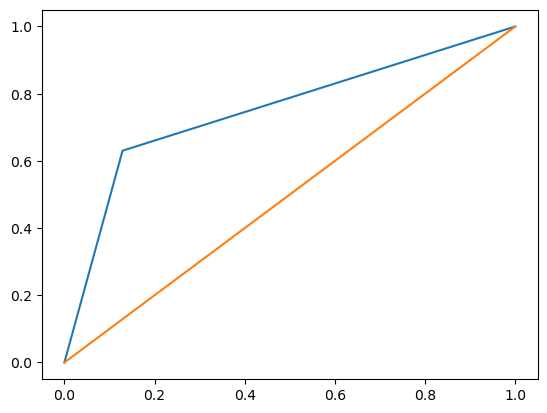

In [35]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.show()

In [36]:
confusion_matrix(y_test,y_pred)

array([[979, 145],
       [139, 237]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1124
           1       0.62      0.63      0.63       376

    accuracy                           0.81      1500
   macro avg       0.75      0.75      0.75      1500
weighted avg       0.81      0.81      0.81      1500



In [38]:
final_pipeline = grid.best_estimator_

In [39]:
print(final_pipeline)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('robust', RobustScaler(),
                                                  ['age', 'fnlwgt',
                                                   'educational_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
          

In [40]:
with open("com_model.pkl","wb") as f:
    pickle.dump(final_pipeline,f)

In [41]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country'],
      dtype='object')

In [42]:
X_train.educational_num.value_counts()

educational_num
9     1167
10     778
13     579
14     192
7      138
11     127
12     124
6       81
4       64
15      63
5       50
8       49
16      38
3       26
2       21
1        3
Name: count, dtype: int64

In [43]:
X_train.capital_gain.value_counts()

capital_gain
0        3199
15024      49
7298       29
7688       25
99999      13
         ... 
914         1
114         1
2977        1
2653        1
7430        1
Name: count, Length: 72, dtype: int64

In [44]:
sorted(X_train.capital_loss.value_counts().index.tolist())

[0,
 213,
 810,
 1380,
 1408,
 1429,
 1485,
 1504,
 1564,
 1579,
 1590,
 1602,
 1617,
 1628,
 1669,
 1672,
 1719,
 1721,
 1740,
 1741,
 1762,
 1825,
 1848,
 1876,
 1887,
 1902,
 1974,
 1977,
 1980,
 2001,
 2002,
 2051,
 2057,
 2129,
 2179,
 2205,
 2246,
 2258,
 2267,
 2339,
 2377,
 2415,
 2444,
 2559,
 2824,
 3770]